In [2]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="ticks")

1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [3]:
Customers = pd.read_csv('Customer.csv') 
Product = pd.read_csv('prod_cat_info.csv')
Transactions = pd.read_csv('Transactions.csv')

### Now merging to get all customers who have done transactions with us 

In [4]:
Customer_Final1 = pd.merge(left = Transactions,
        right = Customers[['customer_Id', 'DOB', 'Gender', 'city_code']],
        left_on = ['cust_id'],
        right_on = ['customer_Id'],
        how = 'left',
        indicator = True)

In [5]:
Customer_Final = pd.merge(left = Customer_Final1,
        right = Product[['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat']],
        left_on = ['prod_cat_code'],
        right_on = ['prod_cat_code'],
        how = 'left',
        indicator = False)
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,both,Clothing,4,Mens
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,both,Clothing,1,Women


2. Prepare a summary report for the merged data set.
 - a. Get the column names and their corresponding data types 
 - b. Top/Bottom 10 observations
 - c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max) 
 - d. Frequency tables for all the categorical variables

In [6]:
#a. column names along with their data types
Customer_Final.dtypes

transaction_id          int64
cust_id                 int64
tran_date              object
prod_subcat_code        int64
prod_cat_code           int64
Qty                     int64
Rate                    int64
Tax                   float64
total_amt             float64
Store_type             object
customer_Id             int64
DOB                    object
Gender                 object
city_code             float64
_merge               category
prod_cat               object
prod_sub_cat_code       int64
prod_subcat            object
dtype: object

In [7]:
#changing the dates into date format plus droping the unnecessary variables 

In [8]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

In [9]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'])

In [10]:
Customer_Final.drop(['prod_subcat_code', 'prod_cat_code', '_merge', 'prod_sub_cat_code', 'cust_id'], axis = 1, inplace= True)

In [11]:
Customer_Final.dtypes

transaction_id             int64
tran_date         datetime64[ns]
Qty                        int64
Rate                       int64
Tax                      float64
total_amt                float64
Store_type                object
customer_Id                int64
DOB               datetime64[ns]
Gender                    object
city_code                float64
prod_cat                  object
prod_subcat               object
dtype: object

In [12]:
#b.top 10 and bottom 10 observations

In [13]:
Customer_Final.head(10)

,transaction_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,2014-02-28,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,Mens
1,80712190438,2014-02-28,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,Women
2,80712190438,2014-02-28,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,Kids
3,29258453508,2014-02-27,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-11-05,F,8.0,Electronics,Mobiles
4,29258453508,2014-02-27,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-11-05,F,8.0,Electronics,Computers
5,29258453508,2014-02-27,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-11-05,F,8.0,Electronics,Personal Appliances
6,29258453508,2014-02-27,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-11-05,F,8.0,Electronics,Cameras
7,29258453508,2014-02-27,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-11-05,F,8.0,Electronics,Audio and video
8,51750724947,2014-02-24,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,Fiction
9,51750724947,2014-02-24,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,Academic


In [14]:
Customer_Final.tail(10)

,transaction_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
99283,72870271171,2011-01-25,3,1142,359.730,3785.730,TeleShop,270911,1970-05-22,M,2.0,Books,Non-Fiction
99284,72870271171,2011-01-25,3,1142,359.730,3785.730,TeleShop,270911,1970-05-22,M,2.0,Books,Children
99285,72870271171,2011-01-25,3,1142,359.730,3785.730,TeleShop,270911,1970-05-22,M,2.0,Books,Comics
99286,72870271171,2011-01-25,3,1142,359.730,3785.730,TeleShop,270911,1970-05-22,M,2.0,Books,DIY
99287,77960931771,2011-01-25,1,447,46.935,493.935,TeleShop,271961,1982-01-15,M,1.0,Books,Fiction
99288,77960931771,2011-01-25,1,447,46.935,493.935,TeleShop,271961,1982-01-15,M,1.0,Books,Academic
99289,77960931771,2011-01-25,1,447,46.935,493.935,TeleShop,271961,1982-01-15,M,1.0,Books,Non-Fiction
99290,77960931771,2011-01-25,1,447,46.935,493.935,TeleShop,271961,1982-01-15,M,1.0,Books,Children
99291,77960931771,2011-01-25,1,447,46.935,493.935,TeleShop,271961,1982-01-15,M,1.0,Books,Comics
99292,77960931771,2011-01-25,1,447,46.935,493.935,TeleShop,271961,1982-01-15,M,1.0,Books,DIY


In [15]:
# c.“Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [16]:
describe = Customer_Final.describe().T

In [17]:
five_number_summary = describe[['min', '25%', '50%', '75%', 'max']].copy()
five_number_summary

,min,25%,50%,75%,max
transaction_id,3268991.000,2.492150e+10,5.011083e+10,7.528121e+10,9.998755e+10
Qty,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,-1499.000,3.130000e+02,7.130000e+02,1.109000e+03,1.500000e+03
Tax,7.350,9.828000e+01,1.999200e+02,3.669750e+02,7.875000e+02
total_amt,-8270.925,7.624500e+02,1.761370e+03,3.585725e+03,8.287500e+03
customer_Id,266783.000,2.689560e+05,2.709820e+05,2.731200e+05,2.752650e+05
city_code,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


d. Frequency tables for all the categorical variables

In [18]:
categorical_variables = ('Store_type', 'Gender', 'prod_cat', 'prod_subcat')

In [19]:
df = Customer_Final.groupby(by='Store_type')[['Store_type']].count().add_prefix("CountOf_").reset_index()

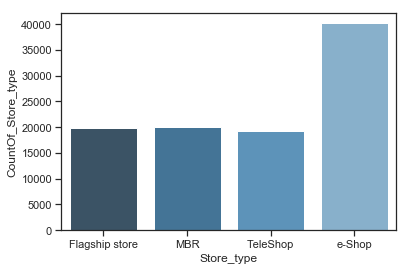

In [20]:
ax = sns.barplot('Store_type', y='CountOf_Store_type', data=df,
                 palette="Blues_d")

In [21]:
DF = Customer_Final.groupby(by='Gender')[['Gender']].count().add_prefix('CountOf_').reset_index()

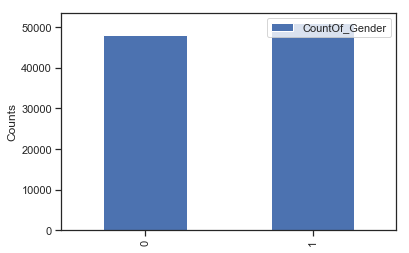

In [22]:
DF.plot(kind='bar')
plt.ylabel('Counts')
plt.show()

In [23]:
Df = Customer_Final.groupby(by = 'prod_cat')[['prod_cat']].count().add_prefix('CountOf_').reset_index()

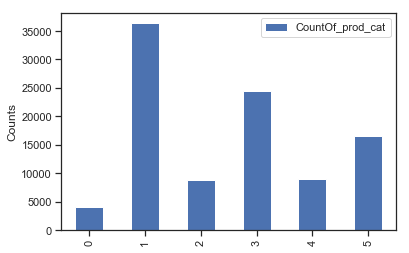

In [24]:
Df.plot(kind ='bar')
plt.ylabel('Counts')
plt.show()

In [25]:
dF= Customer_Final.groupby(by='prod_subcat')[['prod_subcat']].count().add_prefix('CountOf_').reset_index()

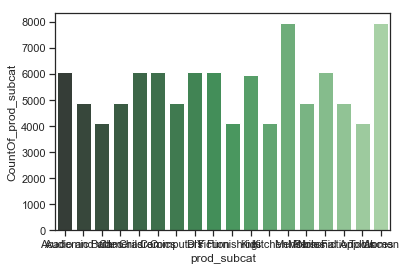

In [28]:
ax = sns.barplot('prod_subcat', y='CountOf_prod_subcat', data=dF,
                 palette="Greens_d")

3. Generate histograms for all continuous variables and frequency bars for categorical variables. 

In [26]:
continuous_variables = ('customer_Id', 'Qty', 'Rate', 'Tax', 'total_amt')

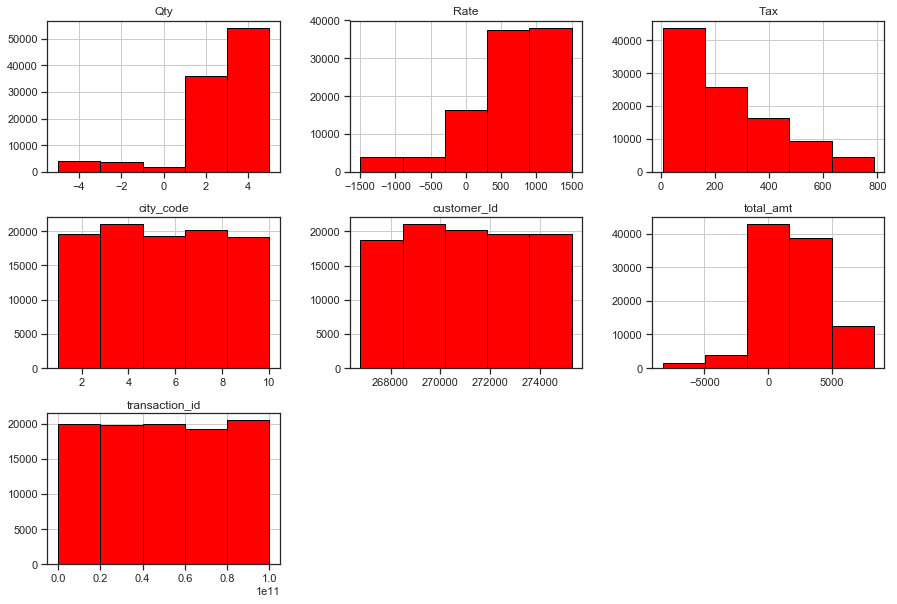

In [27]:
Customer_Final.hist(bins=5, edgecolor = "black", color="red", figsize = (15,10))
plt.xlabel('frequency')
plt.title('Histogram')
plt.show()

In [28]:
categorical_variables = ('Store_type', 'Gender', 'prod_cat', 'prod_subcat')

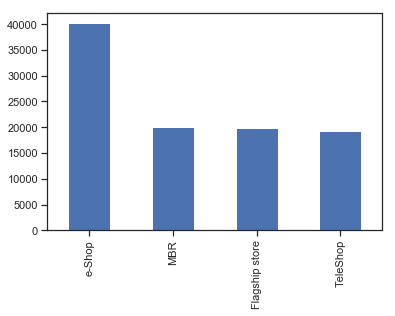

In [29]:
Customer_Final['Store_type'].value_counts().plot('bar')

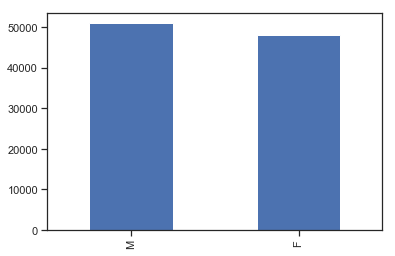

In [30]:
Customer_Final['Gender'].value_counts().plot('bar')

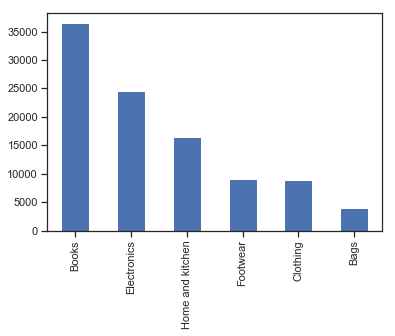

In [31]:
Customer_Final['prod_cat'].value_counts().plot('bar')

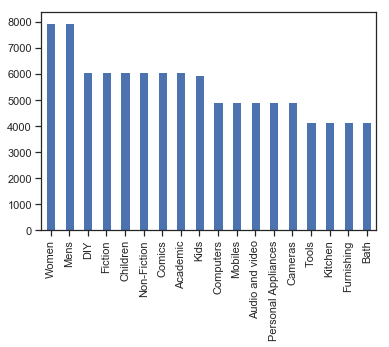

In [32]:
Customer_Final['prod_subcat'].value_counts().plot('bar')

In [33]:
#Frequency bars for categorical variables
df1 = pd.crosstab(index=Customer_Final['Gender'], 
                           columns=Customer_Final['Store_type'])

df1.index= ['F','M']

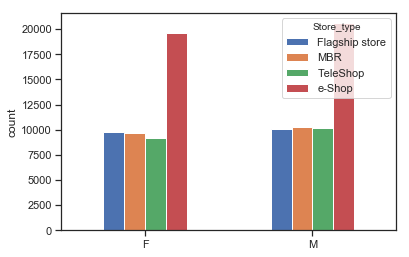

In [34]:
df1.plot(kind='bar')
plt.ylabel('count')
plt.xticks(rotation='horizontal')
plt.show()

4. Calculate the following information using the merged dataset :   
 - a. Time period of the available transaction data  
 - b. Count of transactions where the total amount of transaction was negative

In [35]:
#for a
Customer_Final.set_index(Customer_Final.tran_date, inplace=True)

In [36]:
number_of_days = (Customer_Final.tran_date[0] - Customer_Final.tran_date[-1]).days
number_of_days

1130

In [37]:
#b. count of transaction where transaction is in negative amounts
#method 1
Customer_Final.Qty[Customer_Final.Qty + Customer_Final.total_amt < 0].count()

9294

In [38]:
#method2
Customer_Final.Qty.where(Customer_Final.total_amt < 0).count()

9294

 5. Analyze which product categories are more popular among females vs male customers.

In [39]:
Customer_Final.pivot_table(index='prod_cat', columns='Gender', aggfunc='size', fill_value=0)

Gender,F,M
prod_cat,,
Bags,1988,2008
Books,17694,18696
Clothing,4317,4554
Electronics,11640,12850
Footwear,4587,4407
Home and kitchen,7976,8536


 6. Which City code has the maximum customers and what was the percentage of customers from that city? 

In [40]:
max_cust_city = Customer_Final.groupby('city_code').customer_Id.sum()
sums = Customer_Final.customer_Id.sum()
pcent_of_cust = max_cust_city.sort_values(ascending = False)/sums * 100
pcent_of_cust

city_code
4.0     10.648595
3.0     10.550591
7.0     10.322462
5.0     10.186208
10.0    10.051956
8.0     10.039751
2.0      9.913821
1.0      9.777585
9.0      9.283352
6.0      9.189759
Name: customer_Id, dtype: float64

7. Which store type sells the maximum products by value and by quantity?

In [41]:
Customer_Final.sort_values(by=['total_amt','Qty'] ,ascending=[False, False]).loc[:,['Store_type','total_amt', 'Qty']].head()

,Store_type,total_amt,Qty
tran_date,,,
2013-03-23,e-Shop,8287.5,5
2013-03-23,e-Shop,8287.5,5
2013-03-23,e-Shop,8287.5,5
2012-08-23,MBR,8287.5,5
2012-08-23,MBR,8287.5,5


 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [42]:
Customer_Final.total_amt.where(Customer_Final.Store_type == 'Flagship store', Customer_Final['prod_cat'].isin(['Clothing', 'Electronics'])).sum()

41910611.03999948

 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [43]:
Customer_Final['total_amt'][(Customer_Final['Gender'] == 'M') & (Customer_Final['prod_cat'] == 'Electronics')].sum()

28515547.125

 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts? 

In [44]:
df = Customer_Final.drop(Customer_Final[(Customer_Final['Qty']< 0)].index)
df.head(2)

,transaction_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
tran_date,,,,,,,,,,,,,
2014-02-19,28396777609,2014-02-19,4,1386,582.12,6126.12,TeleShop,269101,1980-06-27,M,7.0,Clothing,Mens
2014-02-19,28396777609,2014-02-19,4,1386,582.12,6126.12,TeleShop,269101,1980-06-27,M,7.0,Clothing,Women


In [45]:
df1 = df.loc[-df.transaction_id.duplicated()]
df1.head(2)

,transaction_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
tran_date,,,,,,,,,,,,,
2014-02-19,28396777609,2014-02-19,4,1386,582.120,6126.120,TeleShop,269101,1980-06-27,M,7.0,Clothing,Mens
2014-02-19,22391667321,2014-02-19,5,723,379.575,3994.575,MBR,270842,1984-07-12,M,2.0,Footwear,Mens


In [46]:
df1.sort_values('customer_Id')

,transaction_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
tran_date,,,,,,,,,,,,,
2011-12-06,4236411732,2011-12-06,1,1238,129.990,1367.990,Flagship store,266788,1972-03-20,F,2.0,Books,Fiction
2012-10-31,5914139604,2012-10-31,2,672,141.120,1485.120,MBR,266788,1972-03-20,F,2.0,Bags,Mens
2012-11-09,42434369409,2012-11-09,2,325,68.250,718.250,Flagship store,266794,1971-02-28,F,9.0,Electronics,Mobiles
2013-06-29,42435707527,2013-06-29,1,123,12.915,135.915,e-Shop,266794,1971-02-28,F,9.0,Electronics,Mobiles
2012-11-03,38727202803,2012-11-03,5,1294,679.350,7149.350,Flagship store,266799,1970-03-16,F,5.0,Electronics,Mobiles
2012-10-18,22473497751,2012-10-18,1,468,49.140,517.140,e-Shop,266806,1991-08-12,F,10.0,Home and kitchen,Furnishing
2012-09-05,75039992579,2012-09-05,3,348,109.620,1153.620,e-Shop,266814,1982-10-18,F,9.0,Home and kitchen,Furnishing
2012-01-11,34749917660,2012-01-11,4,632,265.440,2793.440,MBR,266814,1982-10-18,F,9.0,Home and kitchen,Furnishing
2012-10-06,11256528141,2012-10-06,3,774,243.810,2565.810,TeleShop,266818,1981-08-10,F,2.0,Books,Fiction


In [47]:
df1.customer_Id.count()

3254

In [48]:
df1.transaction_id.count()

3254

11. For all customers aged between 25 - 35, find out:    
 - a. What was the total amount spent for “Electronics” and “Books” product categories?    
 - b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [49]:
now = pd.Timestamp('now')
Customer_Final['age'] = (now - Customer_Final['DOB']).astype('<m8[Y]') 
Customer_Final.head(2)

,transaction_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat,age
tran_date,,,,,,,,,,,,,,
2014-02-28,80712190438,2014-02-28,-5,-772,405.3,-4265.3,e-Shop,270351,1981-09-26,M,5.0,Clothing,Mens,37.0
2014-02-28,80712190438,2014-02-28,-5,-772,405.3,-4265.3,e-Shop,270351,1981-09-26,M,5.0,Clothing,Women,37.0


In [81]:
bool_series = Customer_Final['age'].between(25.0, 35.0, inclusive = True)
cust_final4 = Customer_Final[bool_series]
cust_final4.head(2)

,transaction_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat,age
tran_date,,,,,,,,,,,,,,
2014-02-24,51750724947,2014-02-24,-2,-791,166.11,-1748.11,TeleShop,273420,1992-07-27,M,8.0,Books,Fiction,27.0
2014-02-24,51750724947,2014-02-24,-2,-791,166.11,-1748.11,TeleShop,273420,1992-07-27,M,8.0,Books,Academic,27.0


In [52]:
cust_final4.total_amt.where(cust_final4['prod_cat'].isin(['Electronics', 'Books'])).sum()

53256444.08499999

For all customers aged between 25 - 35, find out:
a. What was the total amount spent for “Electronics” and “Books” product categories?
b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [79]:
cust_final4[(cust_final4['tran_date'] >= '2014-01-01') & (cust_final4['tran_date'] <= '2014-03-01')]['total_amt'].sum()

2649188.88